# GangadharSSingh Assignment 04
# Leaf Classification Using CNN on the Flavia Dataset

## Assignment(Project) Overview
This Assignment aims to build a Convolutional Neural Network (CNN) model to classify plant leaf images from the **Flavia dataset**. The workflow includes data preprocessing, model building, training, evaluation, and performance analysis, comparision between CNN & LSTM and also comparision **with transfer learning via MobileNet model**

---

##  Dataset Description
The **Flavia dataset** contains images of various plant leaves captured on a uniform background. Each image represents a unique species, making it ideal for image classification tasks.

- **Format**: JPEG images
- **Number of Classes**: 32 species
- **Original Image Sizes**: Varying

---

## Data Preprocessing

### Steps:
- Resize all images to a fixed size (e.g., `128x128`)
- Convert to grayscale
- Normalize pixel values to `[0, 1]`
- One-hot encode labels
- Split dataset:
  - Training: 70%
  - Validation: 15%
  - Testing: 15%


#GangadharSShiva Assignment 4
#Assignment Questions
**Preprocess the data:** You will need to preprocess the Flavia dataset by resizing the images to a fixed size, converting them to grayscale, and splitting them into training, validation, and test sets.

**Build a CNN model:** You will need to design and implement a CNN model architecture that can effectively classify plant leaves based on their images.

**Train the model:** You will need to train the CNN model on the preprocessed Flavia dataset using appropriate hyperparameters and regularization techniques.

**Evaluate the model:** You will need to evaluate the performance of the trained CNN model on the test set of the Flavia dataset using appropriate evaluation metrics such as accuracy, precision, recall, and F1 score.

**Analyze the results:** You will need to analyze the performance of the model and identify any potential areas for improvement. You can visualize the learned features of the model, plot confusion matrices, and perform other analysis techniques to gain insights into the model's behavior.


**Question 1 :Preprocess the data:** You will need to preprocess the Flavia dataset by resizing the images to a fixed size, converting them to grayscale, and splitting them into training, validation, and test sets.

In [ ]:
# load leaves folder from google drive

from google.colab import drive
drive.mount('/content/drive')


drive_leaves_dir = '/content/drive/MyDrive/usd-backup/Colab Notebooks/AAI-511/Leaves'


!ls "{drive_leaves_dir}"

dataset_dir = drive_leaves_dir


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1001.jpg  1240.jpg  1479.jpg  2102.jpg	2341.jpg  2580.jpg  3147.jpg  3386.jpg
1002.jpg  1241.jpg  1480.jpg  2103.jpg	2342.jpg  2581.jpg  3148.jpg  3387.jpg
1003.jpg  1242.jpg  1481.jpg  2104.jpg	2343.jpg  2582.jpg  3149.jpg  3388.jpg
1004.jpg  1243.jpg  1482.jpg  2105.jpg	2344.jpg  2583.jpg  3150.jpg  3389.jpg
1005.jpg  1244.jpg  1483.jpg  2106.jpg	2345.jpg  2584.jpg  3151.jpg  3390.jpg
1006.jpg  1245.jpg  1484.jpg  2107.jpg	2346.jpg  2585.jpg  3152.jpg  3391.jpg
1007.jpg  1246.jpg  1485.jpg  2108.jpg	2347.jpg  2586.jpg  3153.jpg  3392.jpg
1008.jpg  1247.jpg  1486.jpg  2109.jpg	2348.jpg  2587.jpg  3154.jpg  3393.jpg
1009.jpg  1248.jpg  1487.jpg  2110.jpg	2349.jpg  2588.jpg  3155.jpg  3394.jpg
1010.jpg  1249.jpg  1488.jpg  2111.jpg	2350.jpg  2589.jpg  3156.jpg  3395.jpg
1011.jpg  1250.jpg  1489.jpg  2112.jpg	2351.jpg  2590.jpg  3157.jpg  3396.jpg
1012.jpg  125

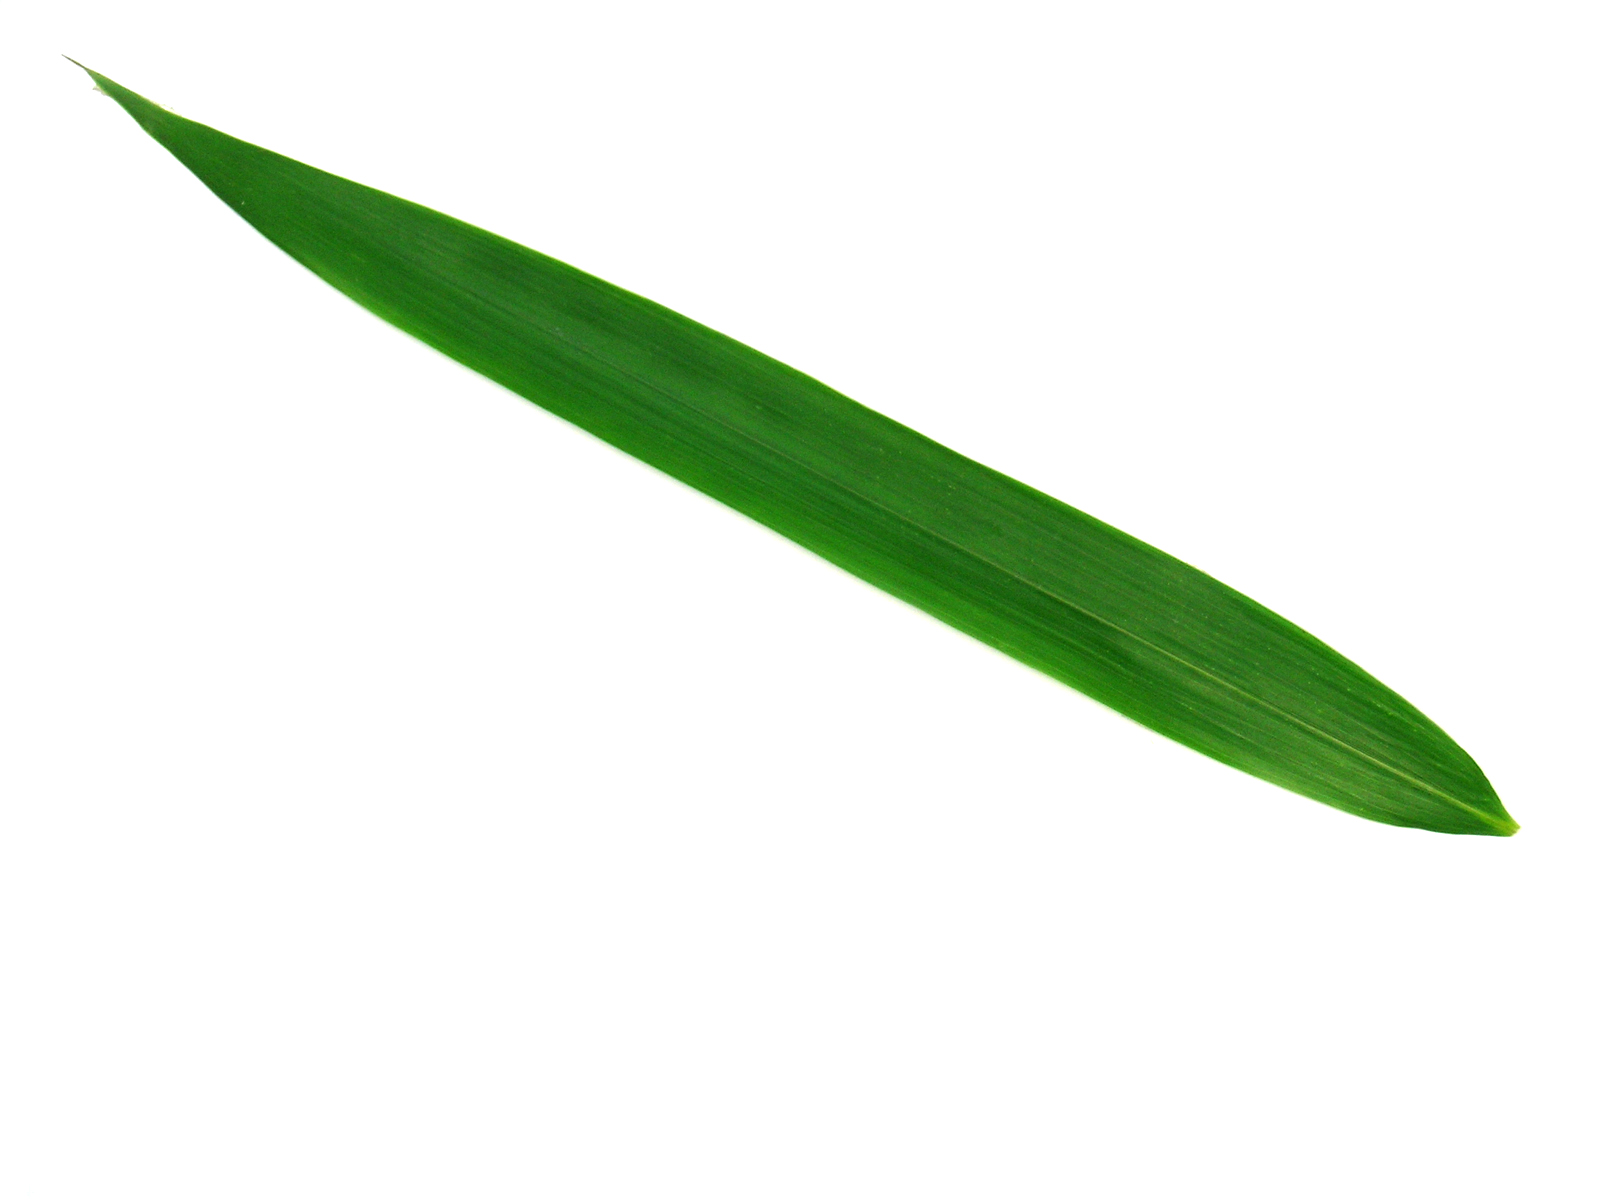

In [ ]:
#/content/drive/MyDrive/usd-backup/Colab Notebooks/AAI-511/Leaves.folder

from IPython.display import Image, display

# Define the path to the image
image_path = '/content/drive/MyDrive/usd-backup/Colab Notebooks/AAI-511/Leaves/1001.jpg'

# Display the image
display(Image(filename=image_path,width=200))

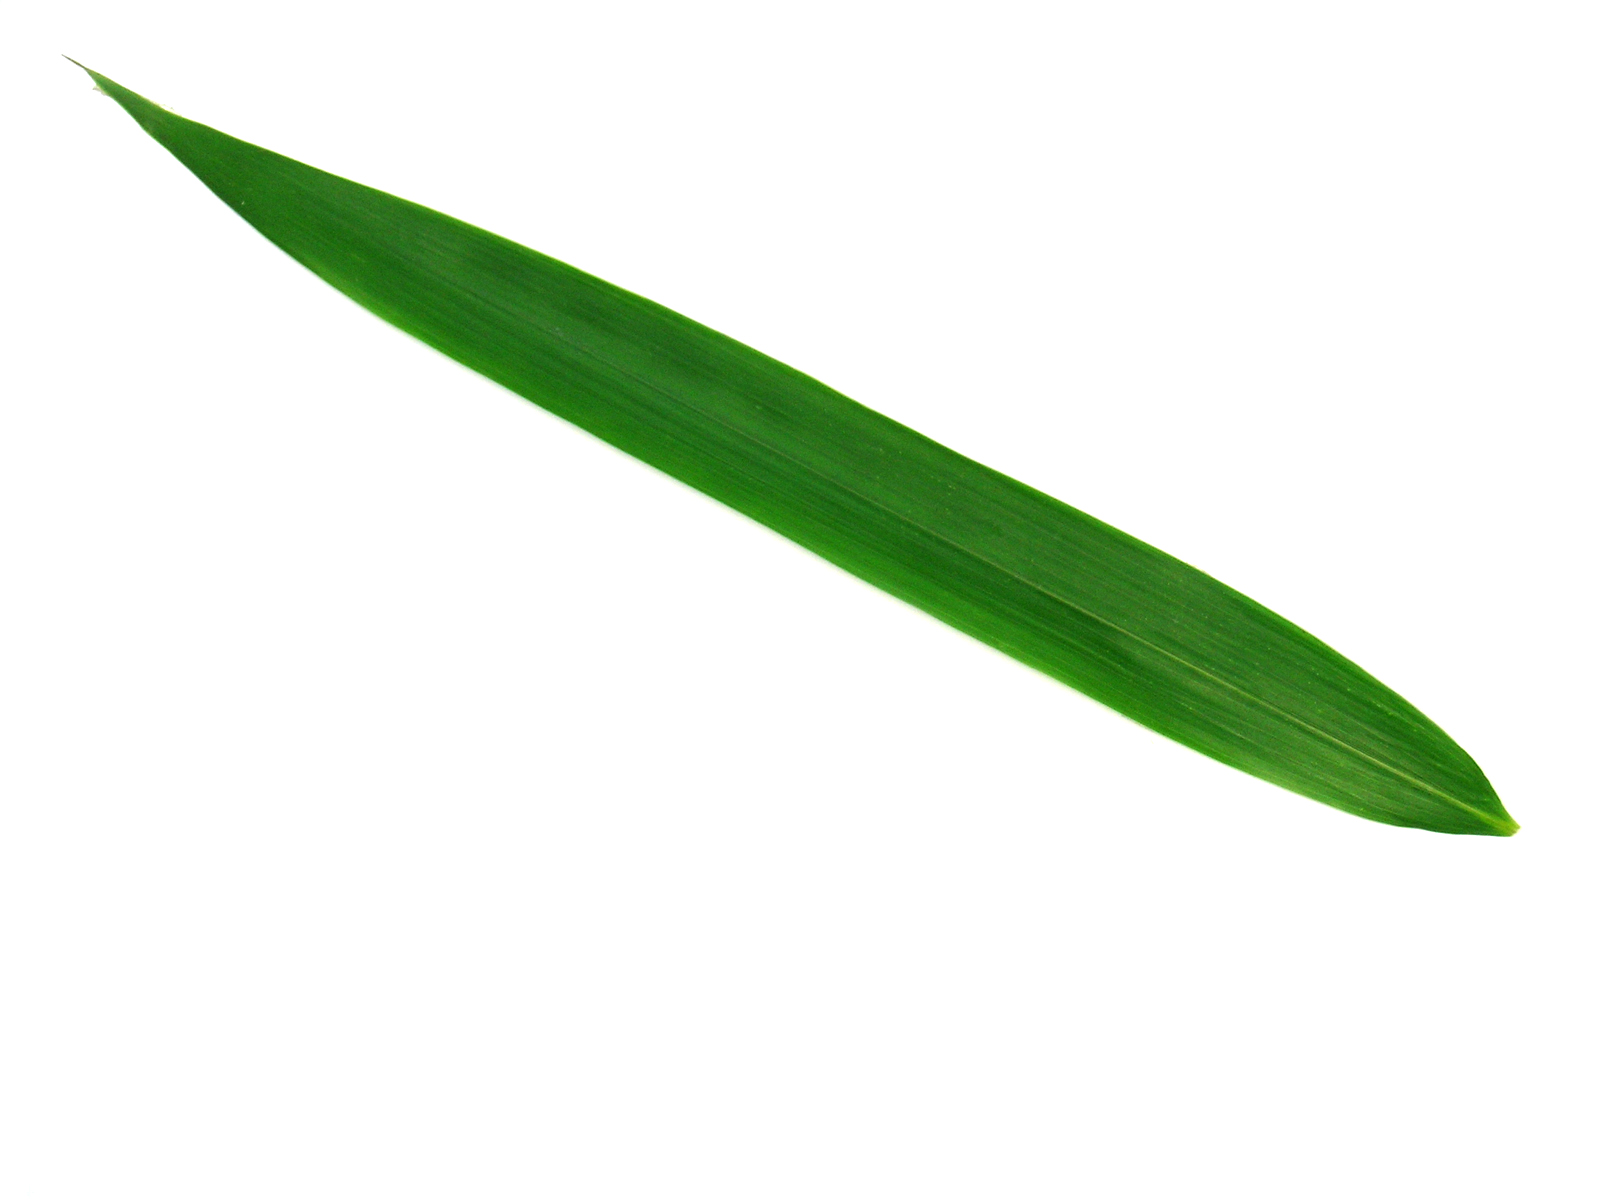

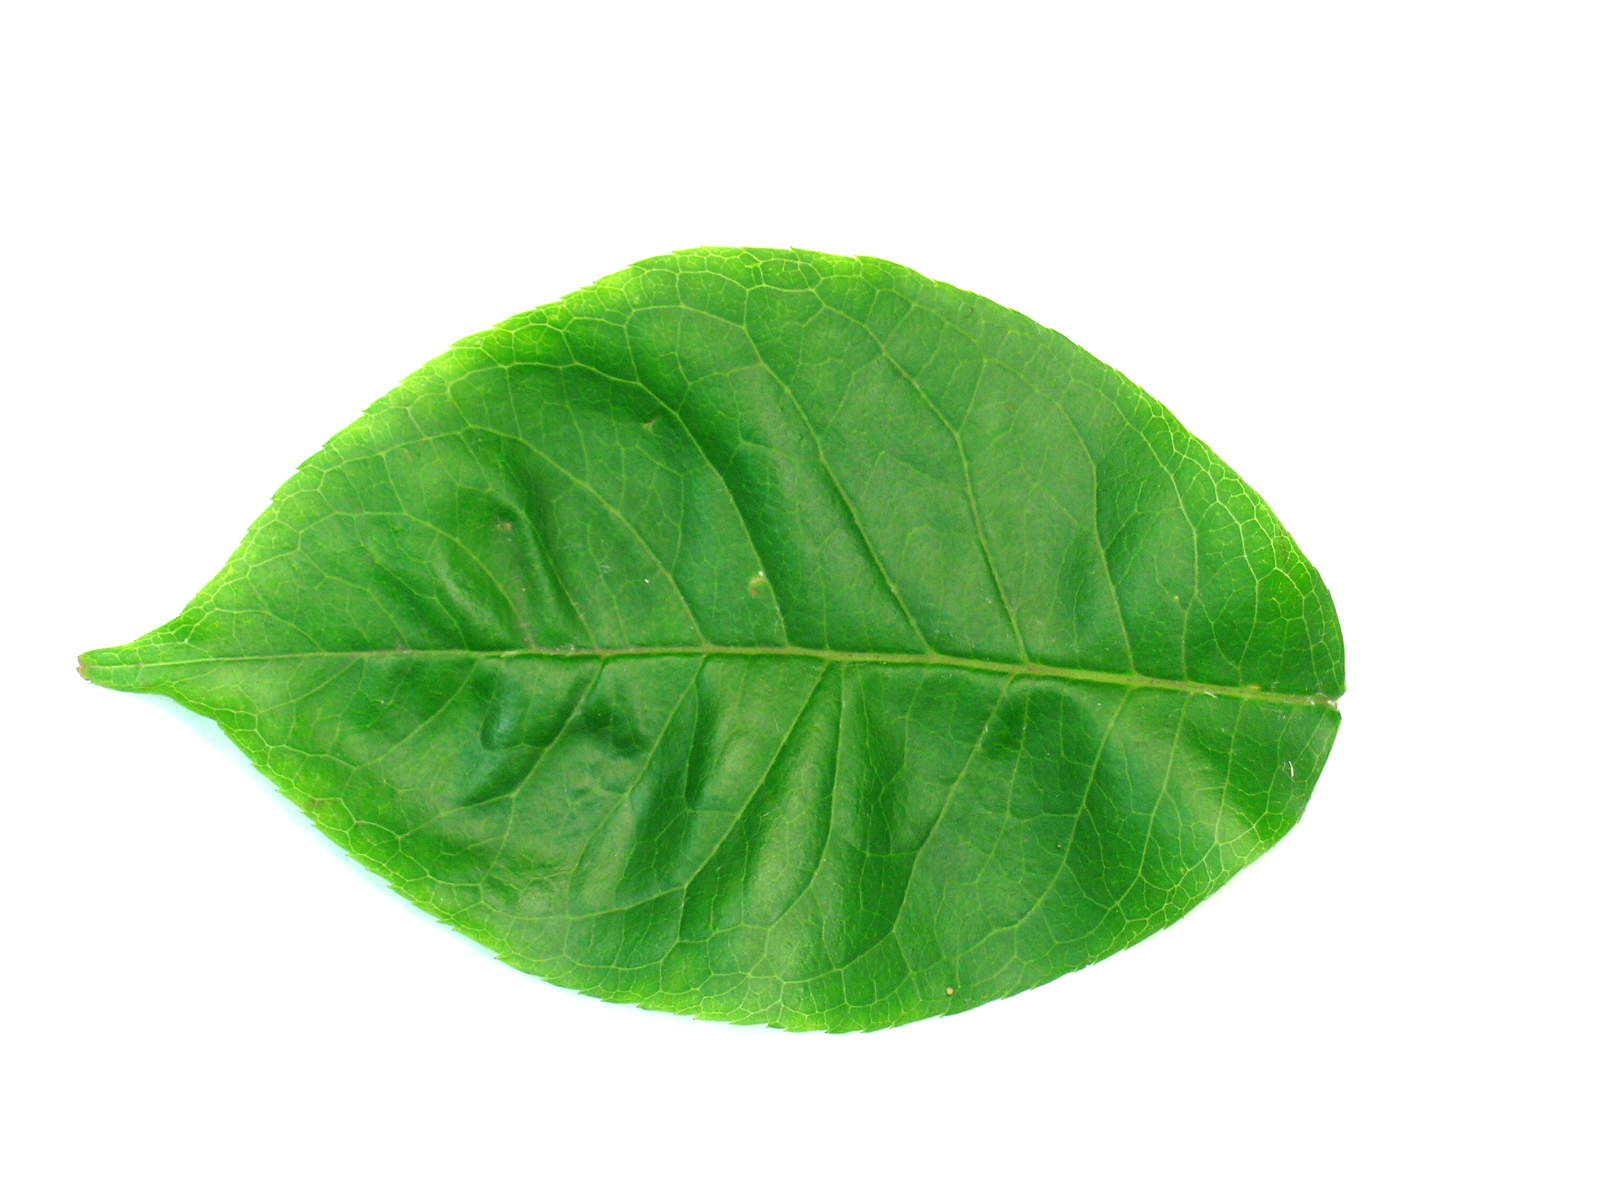

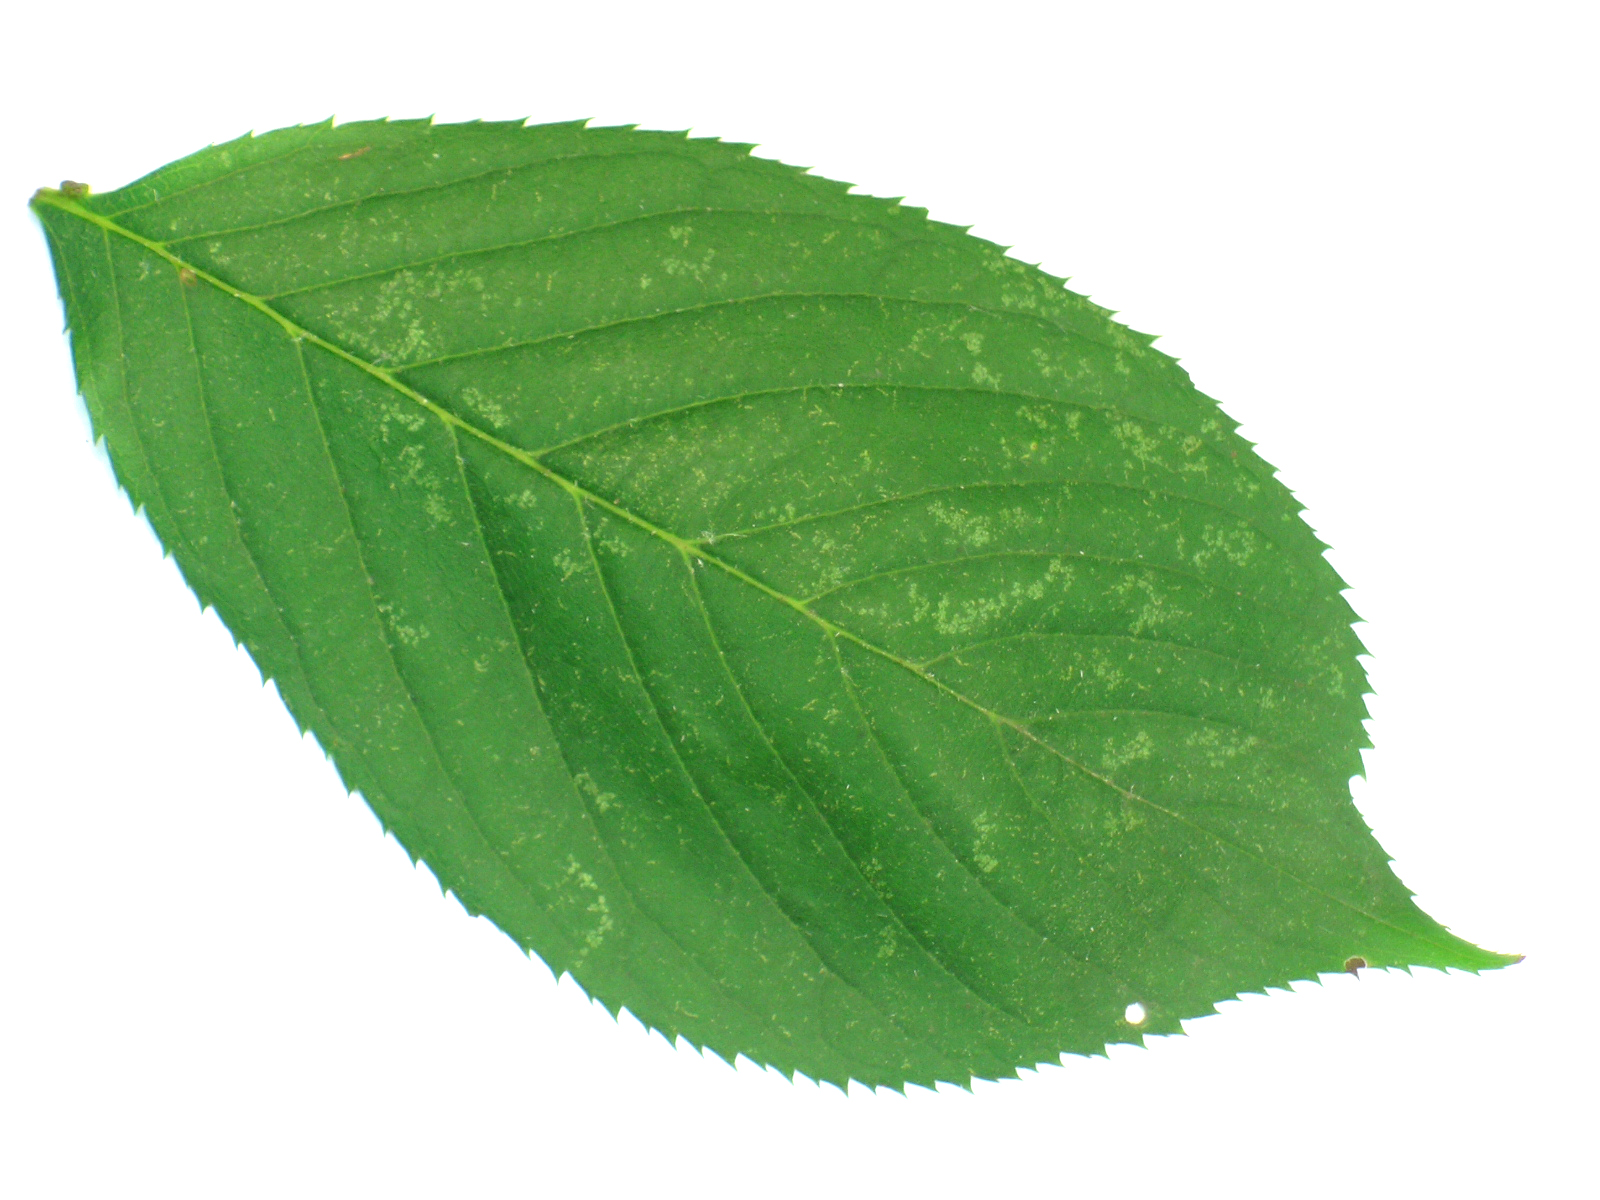

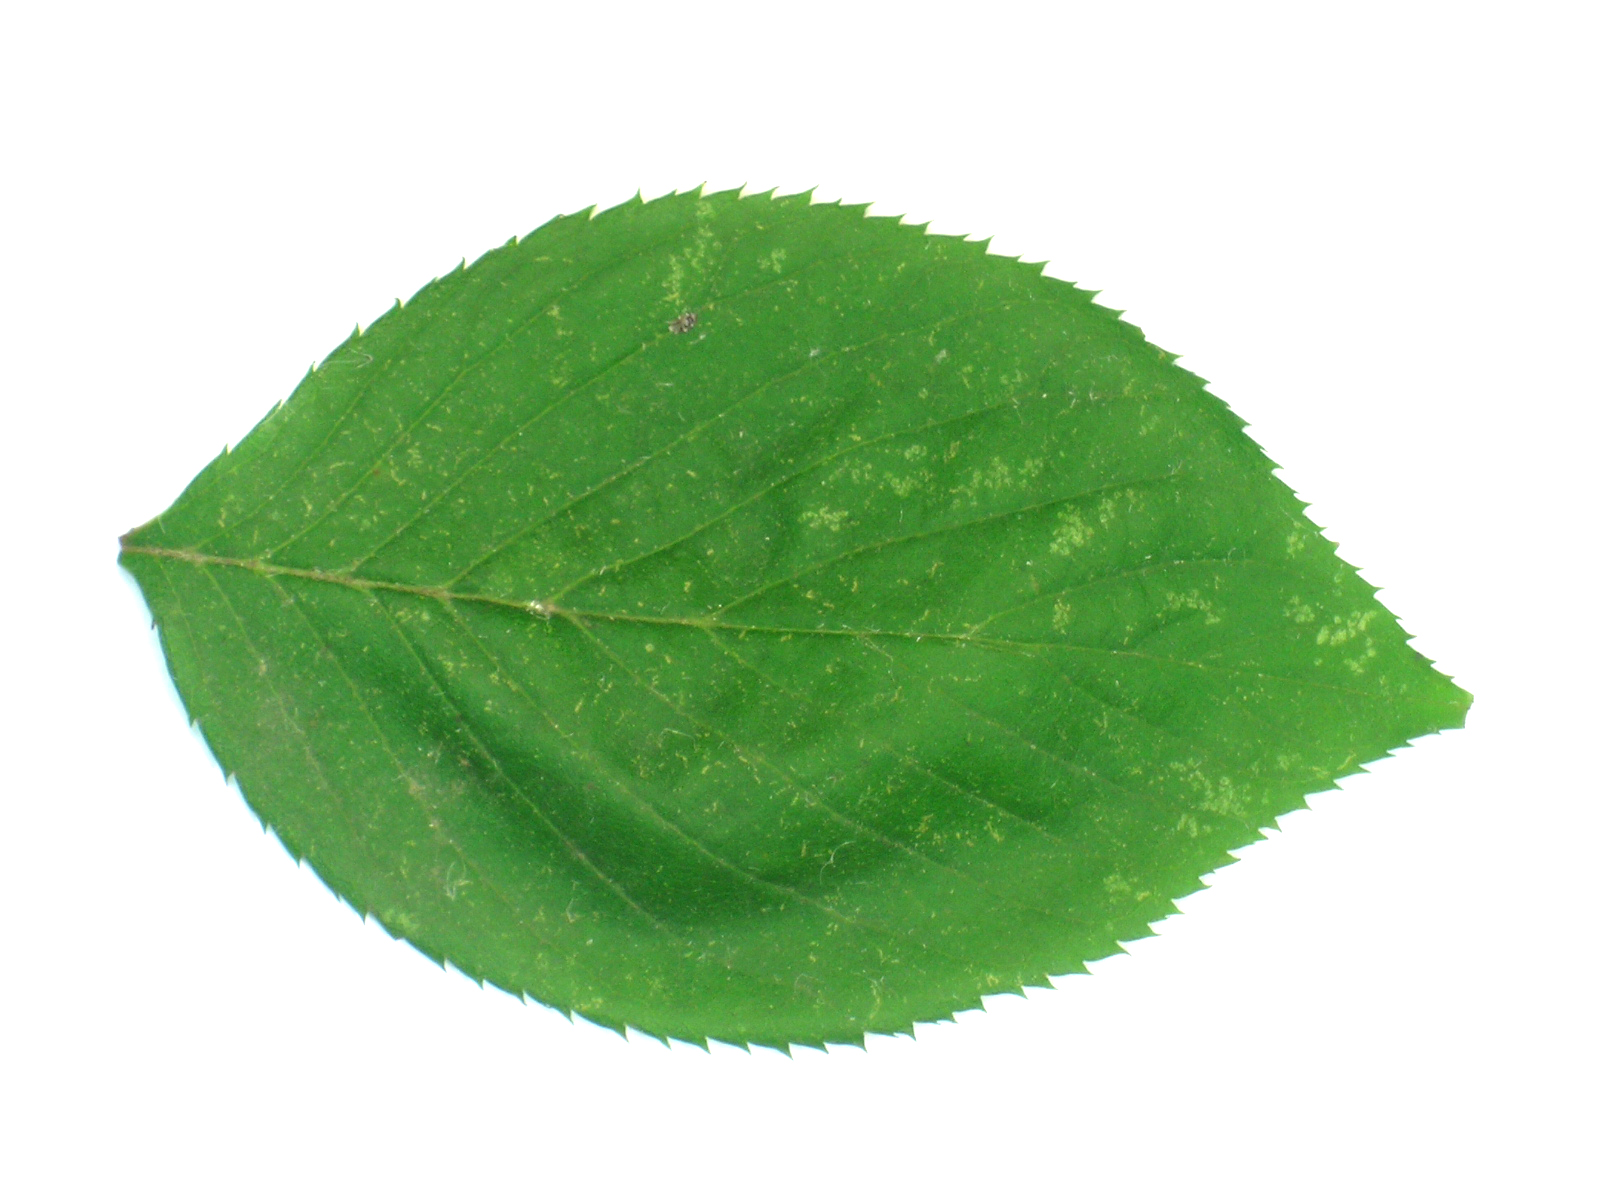

In [ ]:
#

leaf_filenames = ['1001.jpg', '2002.jpg', '3003.jpg', '3001.jpg']
for filename in leaf_filenames:
  image_path = f'{drive_leaves_dir}/{filename}'
  display(Image(filename=image_path,width=200))

In [ ]:
# Y Column is the Class Label, ID Column is the name of the file in the leaves folder.

import pandas as pd

# Load the CSV file into a pandas DataFrame
metadata_path = '/content/drive/MyDrive/usd-backup/Colab Notebooks/AAI-511/Leaves/all.csv'
metadata_df = pd.read_csv(metadata_path)

# Display the first few rows of the DataFrame
print(metadata_df.head())

   Unnamed: 0        id   y
0           0  1300.jpg   5
1           1  3152.jpg  23
2           2  1439.jpg   9
3           3  1243.jpg   4
4           4  1186.jpg   3


**Question 2 Build a CNN model:** You will need to design and implement a CNN

model architecture that can effectively classify plant leaves based on their images.

Found 1907 image files in the directory.
Matched 1907 image files with metadata.
Training data shape: (1334, 128, 128, 1)
Validation data shape: (286, 128, 128, 1)
Test data shape: (287, 128, 128, 1)
Number of classes: 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,308,192 (12.62 MB)

 Trainable params: 3,308,192 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

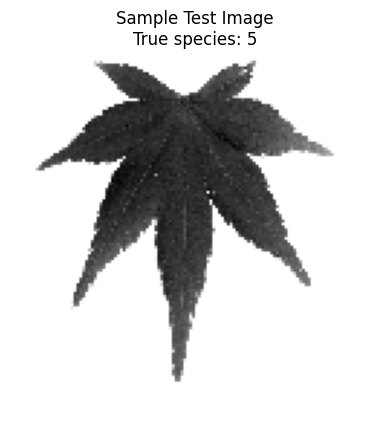

In [ ]:
# Preprocess the Flavia dataset by resizing the images to a fixed size,
# Converting them to grayscale,
# Splitting them into training, validation, and test sets.


#  Data Preprocessing

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from IPython.display import Image, display #
import pandas as pd #
import matplotlib.pyplot as plt #




LEAF_IMAGE_SIZE = (128, 128)
# Function takes a image, converts to greyscale, removes rgb, resizes and
# normalizes

def leaf_preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image file: {image_path}") # Added a warning
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
    img = cv2.resize(img, target_size) # Resize
    img = img / 255.0  # Normalize
    return img

images = []
labels = []
# List all files in the dataset directory that end with .jpg
# ( directory has both jpg and csv file)
image_files = [f for f in os.listdir(dataset_dir) if f.lower().endswith('.jpg')]

print(f"Found {len(image_files)} image files in the directory.")

metadata_df['id_stripped'] = metadata_df['id'].str.strip()
#store the image to labelling mapping
image_to_label = dict(zip(metadata_df['id_stripped'], metadata_df['y']))


# Create a mapping from unique labels to contiguous integer indices
unique_labels = sorted(metadata_df['y'].unique())
species_to_int = {species: i for i, species in enumerate(unique_labels)}
print('Species to Int Mapping{species_to_int }')

num_classes = len(unique_labels)

matched_images_count = 0
for img_file in image_files:
    # Strip whitespace from img_file for robust matching
    img_file_stripped = img_file.strip()
    # Check if the stripped image file exists in the metadata DataFrame
    if img_file_stripped in image_to_label:
        img_path = os.path.join(dataset_dir, img_file)
        processed_img = leaf_preprocess_image(img_path, LEAF_IMAGE_SIZE)

        if processed_img is not None:
            images.append(processed_img)
            species = image_to_label[img_file_stripped] # Use stripped filename for lookup
            labels.append(species_to_int[species])
            matched_images_count += 1
    else:
        print(f"Warning: No metadata found for image file: {img_file}") # Added a warning for missing metadata

print(f"Matched {matched_images_count} image files with metadata.")

images = np.array(images)
labels = np.array(labels)

# Add a channel dimension for grayscale images
if images.ndim == 3 and images.shape[0] > 0: # Check if images array is not empty
    images = np.expand_dims(images, axis=-1)
elif images.shape[0] > 0: # If already grayscale but needs channel dim (shape is (n, h, w))
     images = np.expand_dims(images, axis=-1)

# One-hot encode labels
if len(labels) > 0: # Check if labels array is not empty
    labels_categorical = to_categorical(labels, num_classes=num_classes)
else:
    labels_categorical = np.array([]) # Initialize as empty array if no labels

# Split data
if images.shape[0] > 0: # Check if there are samples before splitting
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels_categorical, test_size=0.3, random_state=42, stratify=labels_categorical)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    print(f"Training data shape: {X_train.shape}")
    print(f"Validation data shape: {X_val.shape}")
    print(f"Test data shape: {X_test.shape}")
    print(f"Number of classes: {num_classes}")

    # # Build a CNN model:
    # # design and implement a CNN model architecture that can effectively classify plant
    # leaves based on their images , display some test image
    # use metadata_df for classes determination

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(LEAF_IMAGE_SIZE[0], LEAF_IMAGE_SIZE[1], 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # --- Display a test image (from the test set) ---
    if X_test.shape[0] > 0:
        random_index = random.randint(0, X_test.shape[0] - 1)
        test_image = X_test[random_index]
        true_label_encoded = y_test[random_index]
        true_label_index = np.argmax(true_label_encoded)
        # Get the original species label from the unique_labels list
        true_species = unique_labels[true_label_index]

        # Display the image (need to remove the channel dimension for display)
        display_image = (test_image * 255).astype(np.uint8).squeeze()
        # Use matplotlib to display the image
        plt.imshow(display_image, cmap='gray')
        plt.title(f"Sample Test Image\nTrue species: {true_species}")
        plt.axis('off')
        plt.show()

    else:
        print("No test images available to display.")
else:
    print("No images were loaded and processed successfully. Cannot build and train the model.")

## Dataset Summary: Flavia Leaf Classification

### Image Summary
- **Total Images Found**: 1,907
- **Images Matched with Metadata**: 1,907
- The dataset is complete and correctly labeled.

---

### Data Split

| Dataset       | Number of Images | Shape per Image     | Description                                       |
|---------------|------------------|----------------------|---------------------------------------------------|
| **Training**   | 1,334             | (128, 128, 1)         | Used for model training (~70% of total data)      |
| **Validation** | 286               | (128, 128, 1)         | Used for hyperparameter tuning (~15%)             |
| **Testing**    | 287               | (128, 128, 1)         | Used to evaluate model performance (~15%)         |

- All images are:
  - **Grayscale** (`1` channel)
  - **Resized** to `128x128` pixels during preprocessing

---

###  Classification Details

- **Number of Classes**: 32
- Each class corresponds to a **unique plant species**
- This is a **multi-class classification problem**
- Recommended final model layer:
  ```python
  Dense(32, activation='softmax')


## CNN Model Architecture Summary

This is the architecture of the CNN model implemented using Keras' `Sequential` API for classifying 32 species of plant leaves from the Flavia dataset.

---

### Layer-by-Layer Breakdown

| Layer Type         | Output Shape           | Parameters | Description |
|--------------------|------------------------|------------|-------------|
| **Conv2D (32 filters)**      | `(None, 126, 126, 32)` | 320        | Applies 32 3x3 filters to the input grayscale image (128x128x1), reducing spatial size by 2 (no padding). |
| **MaxPooling2D**   | `(None, 63, 63, 32)`   | 0          | Downsamples by a factor of 2 (2x2 pool size). |
| **Conv2D (64 filters)**      | `(None, 61, 61, 64)`   | 18,496     | Applies 64 3x3 filters, further reducing spatial size. |
| **MaxPooling2D**   | `(None, 30, 30, 64)`   | 0          | Downsamples again by 2x2 pooling. |
| **Conv2D (128 filters)**     | `(None, 28, 28, 128)`  | 73,856     | Deeper feature extraction with 128 filters. |
| **MaxPooling2D**   | `(None, 14, 14, 128)`  | 0          | Downsamples to 14x14x128. |
| **Flatten**        | `(None, 25088)`        | 0          | Converts 3D feature map into a 1D vector for the Dense layers. |
| **Dense (128 units)**        | `(None, 128)`           | 3,211,392  | Fully connected layer with 128 neurons. |
| **Dropout (rate=0.5)** | `(None, 128)`       | 0          | Regularization to prevent overfitting. |
| **Dense (32 units)**         | `(None, 32)`            | 4,128      | Output layer with softmax activation for 32 classes. |

---

### Model Summary

- **Total Parameters**: `3,308,192`  
- **Trainable Parameters**: `3,308,192`  
- **Non-trainable Parameters**: `0`  
- **Model Size**: ~12.6 MB  

---

### Interpretation

- The model consists of **3 convolutional layers**, each followed by **max pooling**, to extract spatial features.
- A **flatten layer** prepares the data for fully connected layers.
- The **dense layer** with 128 units learns high-level patterns.
- **Dropout** is used for regularization.
- Final **dense layer with 32 units** maps features to one of the 32 plant species using **softmax activation**.

---

### Suitable For:
- Multi-class classification (32 plant species)
- Grayscale images resized to 128x128
- Dataset like Flavia with modest size and high intra-class similarity



#

# Below Cell Block answers 3,4,5.

**Question 3: Train the model:** You will need to train the CNN model on the preprocessed Flavia dataset using appropriate hyperparameters and regularization techniques.

**Question 4Evaluate the model**: You will need to evaluate the performance of the trained CNN model on the test set of the Flavia dataset using appropriate evaluation metrics such as accuracy, precision, recall, and F1 score.

**Question 5 Analyze the results:**You will need to analyze the performance of the model and identify any potential areas for improvement. You can visualize the learned features of the model, plot confusion matrices, and perform other analysis techniques to gain insights into the model's behavior.

In [ ]:

#  train the CNN model on the preprocessed Flavia dataset using appropriate hyperparameters and regularization techniques.

import matplotlib.pyplot as plt
import numpy as np
import kerastuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential # Import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import necessary layers
import tensorflow as tf # Import tensorflow


# Tune and identify the best model


def build_tunable_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), (3, 3), activation='relu', input_shape=(LEAF_IMAGE_SIZE[0], LEAF_IMAGE_SIZE[1], 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_2_filter', min_value=64, max_value=256, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    # Add optional third convolutional layer
    if hp.Boolean("use_conv_3"):
        model.add(Conv2D(hp.Int('conv_3_filter', min_value=128, max_value=512, step=64), (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(hp.Int('dense_1_units', min_value=64, max_value=512, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Set up the tuner
tuner = kt.Hyperband(
    build_tunable_model,
    objective='val_accuracy',
    max_epochs=3,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt')

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement
    restore_best_weights=True
)


# Run the hyperparameter search
if 'X_train' in locals() and X_train.shape[0] > 0:
    print("Starting hyperparameter tuning...")
    tuner.search(X_train, y_train,
                 epochs=3,
                 validation_data=(X_val, y_val),
                 callbacks=[early_stopping]) # Pass the early stopping callback

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"""
    optimal number of filters in the first conv layer is {best_hps.get('conv_1_filter')}.
    optimal number of filters in the second conv layer is {best_hps.get('conv_2_filter')}.
    Whether to use a third conv layer is {best_hps.get('use_conv_3')}.
    optimal number of filters in the third conv layer is {best_hps.get('conv_3_filter') if best_hps.get('use_conv_3') else 'N/A'}.
    optimal number of units in the first dense layer is {best_hps.get('dense_1_units')}.
    optimal dropout rate is {best_hps.get('dropout')}.
    """)

    # Build the best model
    best_model = tuner.get_best_models(num_models=1)[0]

    # Evaluate the best model on the test data
    if 'X_test' in locals() and X_test.shape[0] > 0:
        print("Evaluating the best model on test data...")
        loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)

        print(f"Test Loss: {loss:.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")
    else:
        print("No test data available to evaluate the model.")
else:
    print("Training data is not loaded correctly, cannot perform hyperparameter tuning.")

Trial 30 Complete [00h 01m 12s]
val_accuracy: 0.8986014127731323

Best val_accuracy So Far: 0.9160839319229126
Total elapsed time: 00h 31m 26s

    The optimal number of filters in the first conv layer is 96.
    The optimal number of filters in the second conv layer is 128.
    Whether to use a third conv layer is True.
    The optimal number of filters in the third conv layer is 128.
    The optimal number of units in the first dense layer is 192.
    The optimal dropout rate is 0.30000000000000004.
    
Evaluating the best model on test data...
Test Loss: 0.6464
Test Accuracy: 0.8780


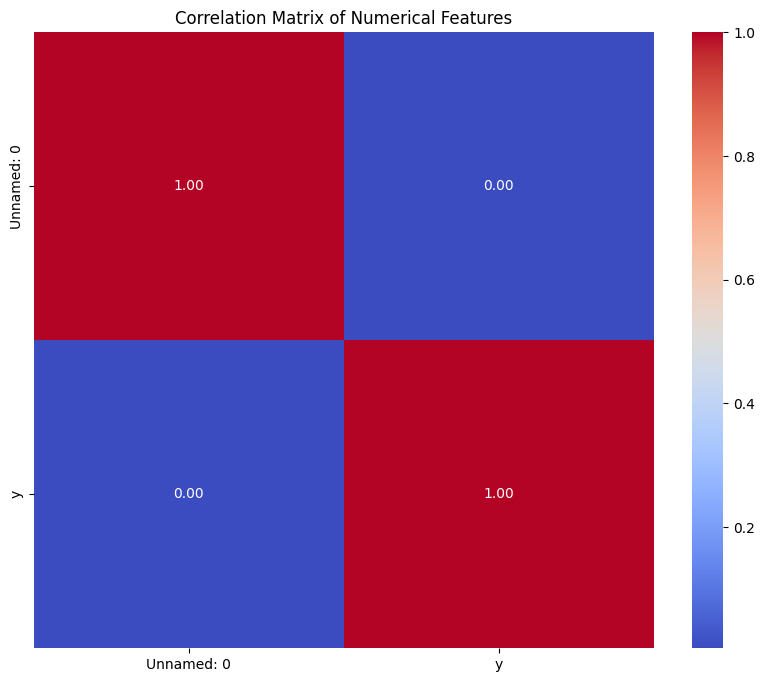

In [ ]:
# Plot correlation matix

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

numerical_df = metadata_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


--- Model Evaluation on Test Set ---
Test Loss: 0.6464
Test Accuracy: 0.8780
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.60      0.90      0.72        10
           2       0.67      0.60      0.63        10
           3       0.85      1.00      0.92        11
           4       0.90      0.82      0.86        11
           5       0.73      1.00      0.84         8
           6       0.90      0.90      0.90        10
           7       0.89      1.00      0.94         8
           8       0.67      0.75      0.71         8
           9       1.00      0.89      0.94         9
          10       1.00      0.86      0.92         7
          11       1.00      0.90      0.95        10
          12       1.00      0.88      0.93         8
          13       0.90      0.90      0.90        10
          14       0.75      1.00      0.86      

/tmp/ipython-input-13-4146123997.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='precision', data=metrics_df, palette='viridis')


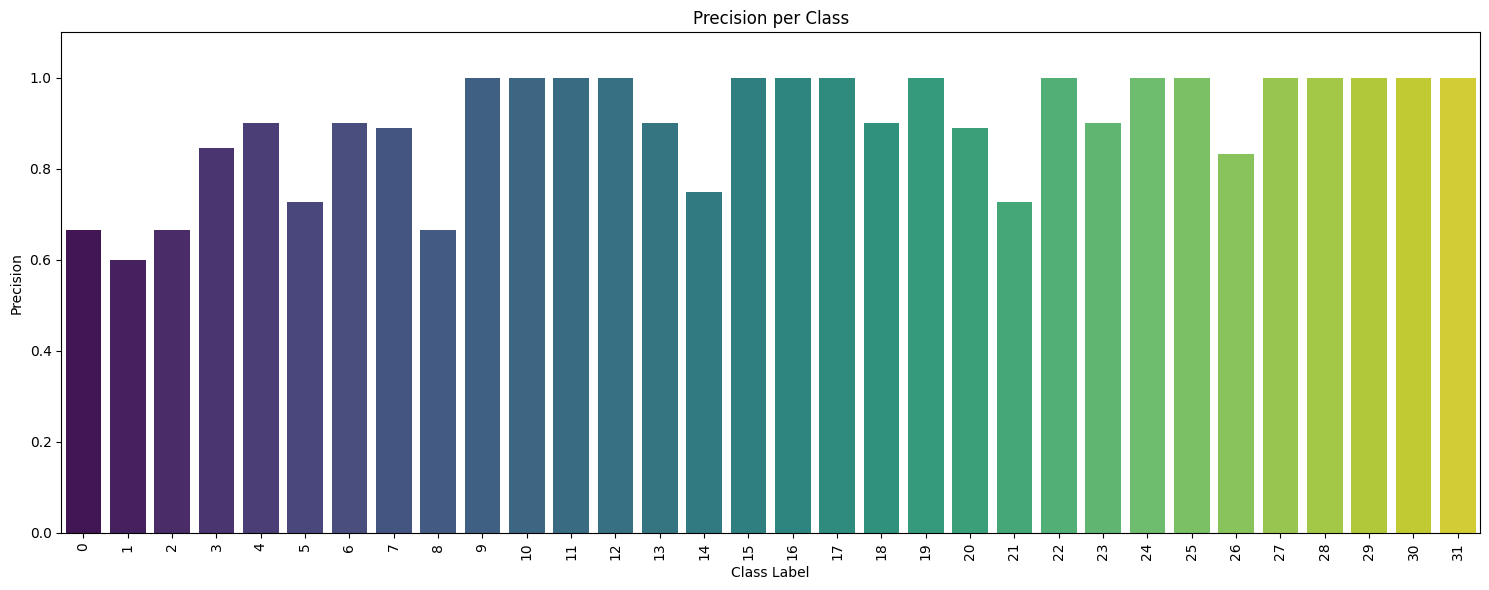

/tmp/ipython-input-13-4146123997.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='recall', data=metrics_df, palette='magma')


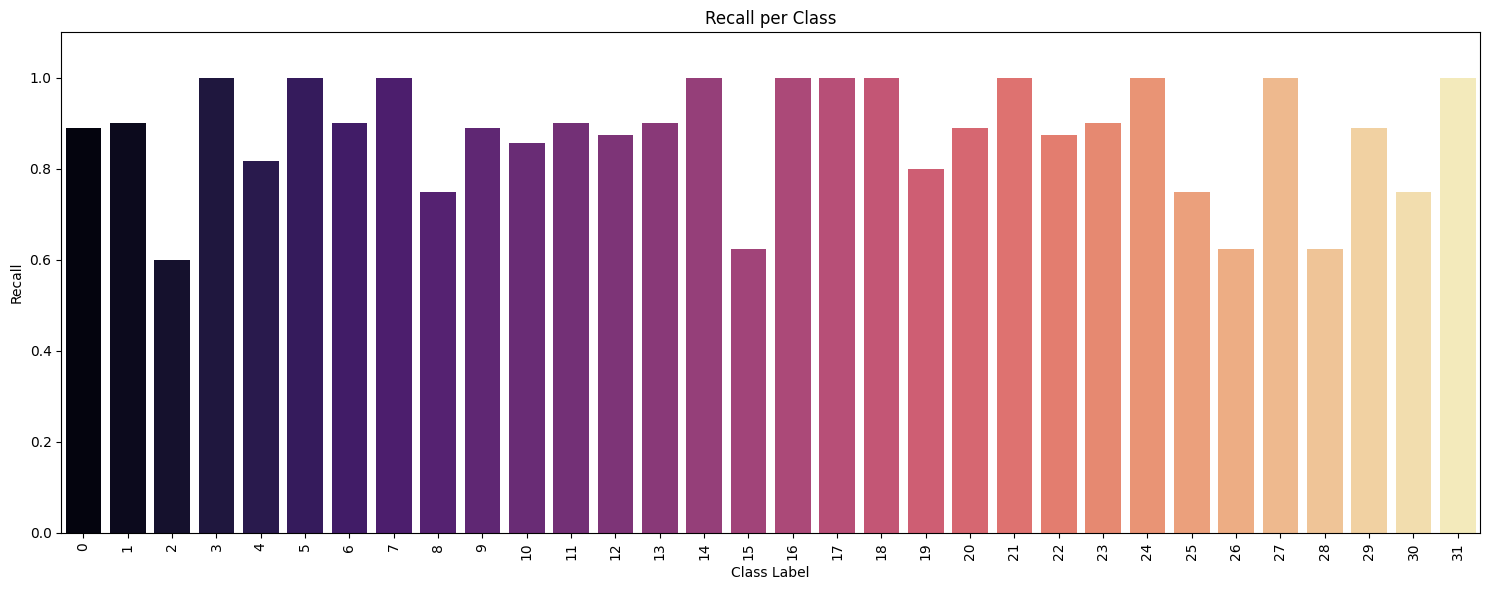

/tmp/ipython-input-13-4146123997.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='f1-score', data=metrics_df, palette='cividis')


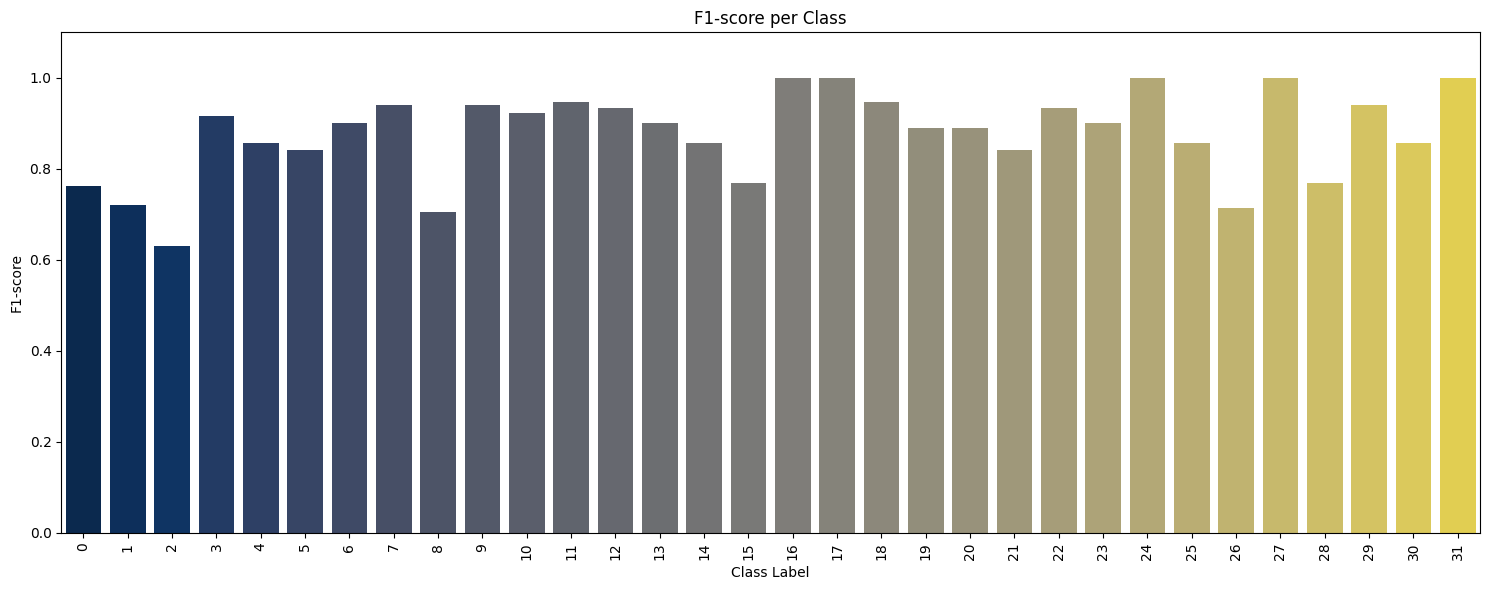


Plotting Confusion Matrix...


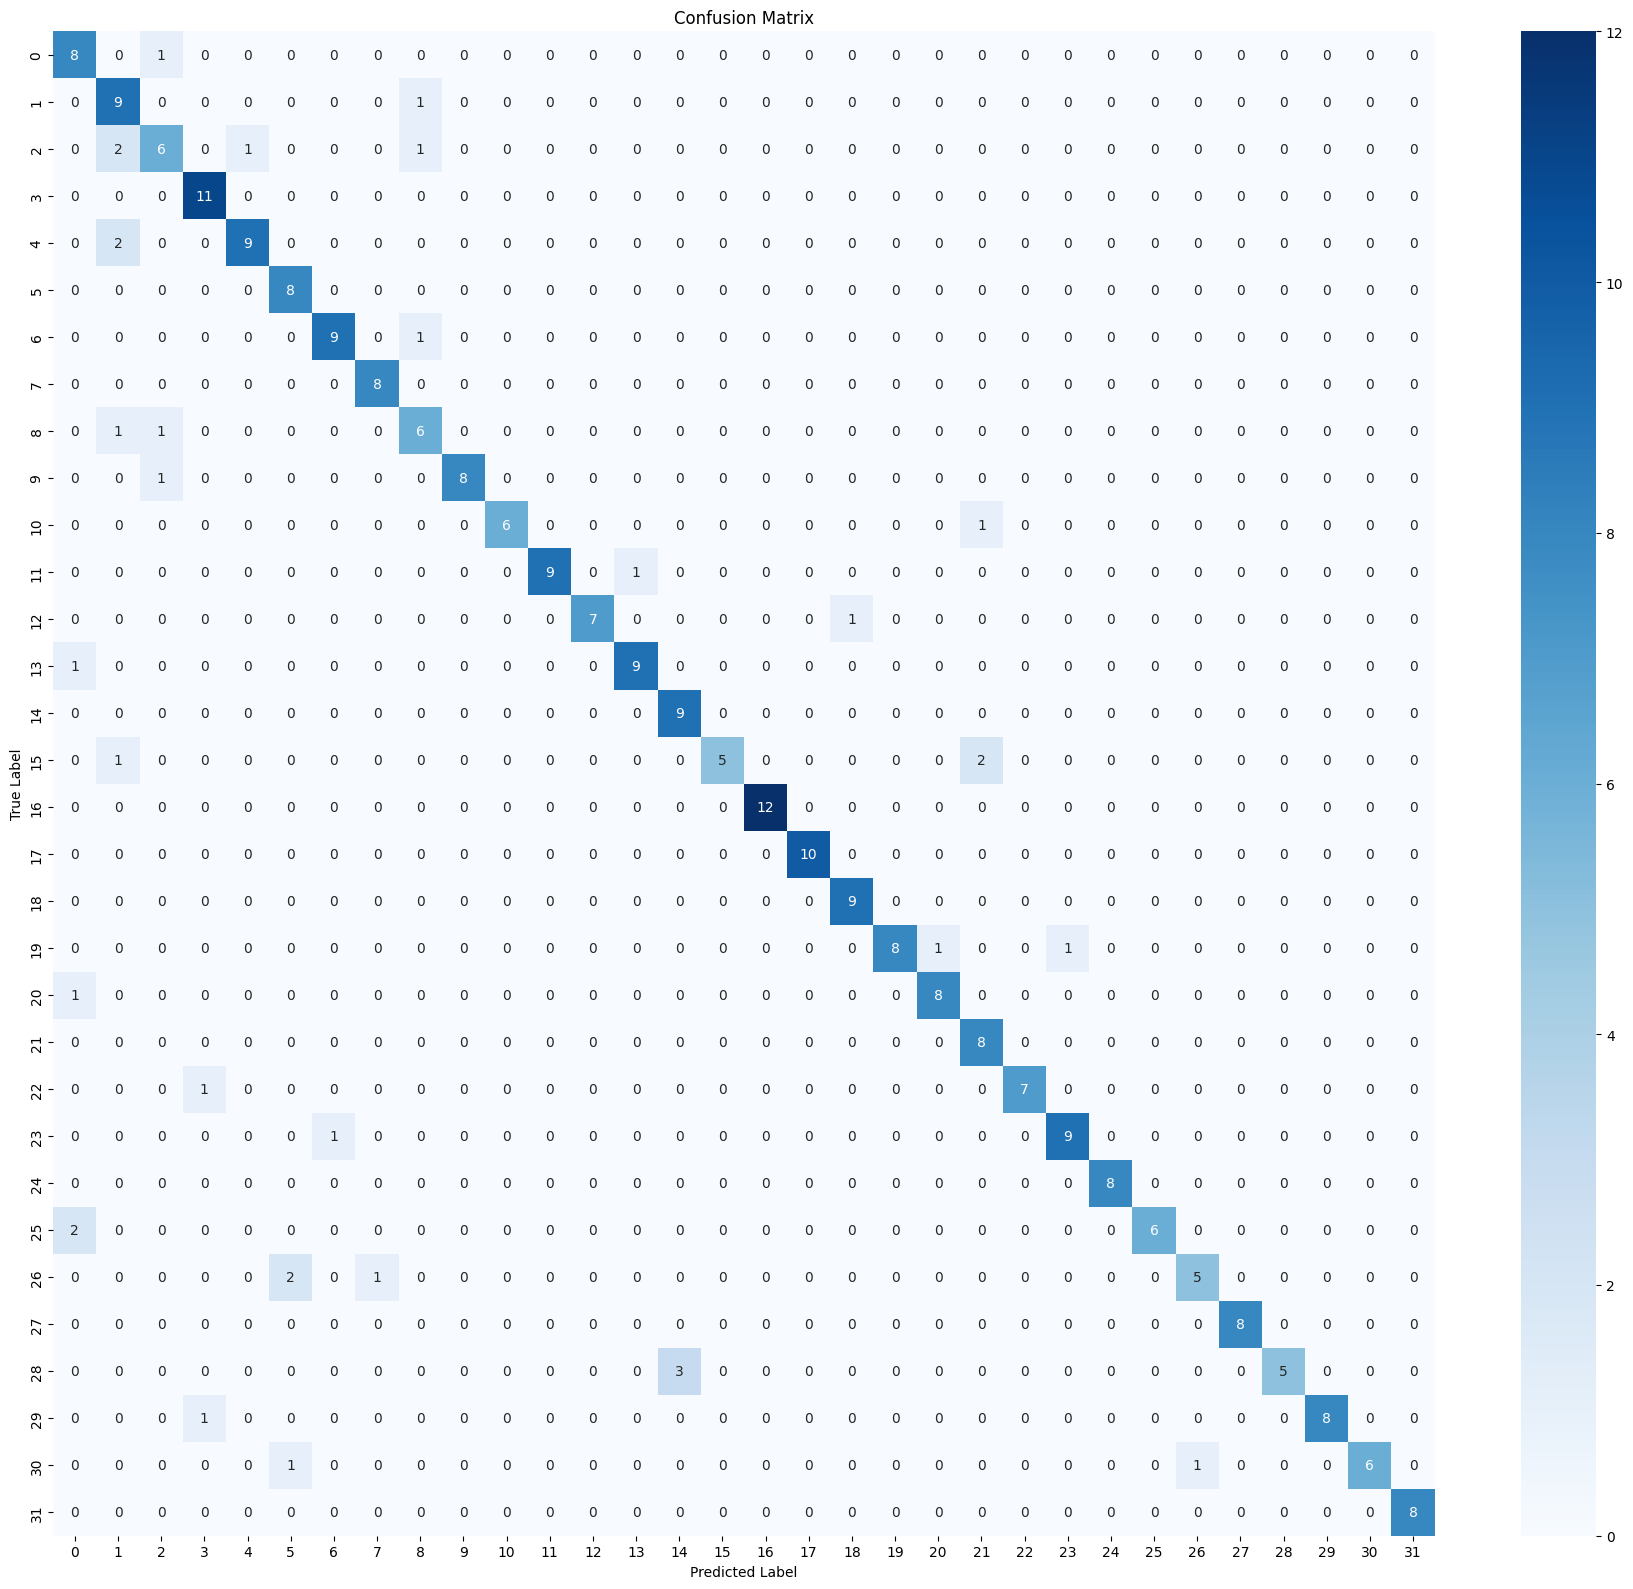

In [ ]:
# Evaluate the performance of the trained CNN model on the test set of the Flavia dataset using appropriate evaluation metrics
# such as accuracy, precision, recall, and F1 score, and plot the graphs

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Evaluate the best model on the test data and plot results


if 'best_model' in locals() and 'X_test' in locals() and 'y_test' in locals() and X_test.shape[0] > 0:
    print("\n--- Model Evaluation on Test Set ---")

    # Evaluate the model to get loss and accuracy
    loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Make predictions to calculate classification metrics
    y_pred_probs = best_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Ensure unique_labels is available and corresponds to the integer indices
    if 'unique_labels' in locals():
        target_names = [str(label) for label in unique_labels]
    else:
        # Fallback if unique_labels is not available, use integer class names
        target_names = [str(i) for i in range(num_classes)]

    # Determine which classes are actually present in the true and predicted labels
    present_classes_indices = np.unique(np.concatenate((y_true_classes, y_pred_classes)))
    filtered_target_names = [target_names[i] for i in present_classes_indices]

    # Generate Classification Report (Precision, Recall, F1-score)
    print("\nClassification Report:")
    report = classification_report(y_true_classes, y_pred_classes,
                                    labels=present_classes_indices,
                                    target_names=filtered_target_names,
                                    output_dict=True, # Get output as dictionary for plotting
                                    zero_division=0)

    # Print the report in a readable format
    print(classification_report(y_true_classes, y_pred_classes,
                                labels=present_classes_indices,
                                target_names=filtered_target_names,
                                zero_division=0))


    # Extract metrics for plotting (excluding 'accuracy', 'macro avg', 'weighted avg')
    metrics_data = {label: report[label] for label in filtered_target_names}

    # Create DataFrames for plotting
    metrics_df = pd.DataFrame(metrics_data).T[['precision', 'recall', 'f1-score']]
    metrics_df = metrics_df.reset_index().rename(columns={'index': 'Class'})


    # Plot Precision
    plt.figure(figsize=(15, 6))
    sns.barplot(x='Class', y='precision', data=metrics_df, palette='viridis')
    plt.title('Precision per Class')
    plt.ylabel('Precision')
    plt.xlabel('Class Label')
    plt.xticks(rotation=90)
    plt.ylim(0, 1.1) # Ensure y-axis starts from 0 and goes slightly above 1
    plt.tight_layout()
    plt.show()

    # Plot Recall
    plt.figure(figsize=(15, 6))
    sns.barplot(x='Class', y='recall', data=metrics_df, palette='magma')
    plt.title('Recall per Class')
    plt.ylabel('Recall')
    plt.xlabel('Class Label')
    plt.xticks(rotation=90)
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()

    # Plot F1-score
    plt.figure(figsize=(15, 6))
    sns.barplot(x='Class', y='f1-score', data=metrics_df, palette='cividis')
    plt.title('F1-score per Class')
    plt.ylabel('F1-score')
    plt.xlabel('Class Label')
    plt.xticks(rotation=90)
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()

    # Plot Confusion Matrix
    print("\nPlotting Confusion Matrix...")
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, labels=present_classes_indices)

    plt.figure(figsize=(18, 16)) # Increased figure size for better readability
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=filtered_target_names,
                yticklabels=filtered_target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


else:
    print("\nEvaluation Skipped ")
    print("Model, test data, or necessary variables are not available to perform evaluation and plotting.")



# Experiment creating an LSM model for Images and Compare with CNN Model

Data available for LSTM modeling.
LSTM Training data shape: (1334, 128, 128)
LSTM Validation data shape: (286, 128, 128)
LSTM Test data shape: (287, 128, 128)

LSTM Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,712 (530.12 KB)

 Trainable params: 135,712 (530.12 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.0303 - loss: 3.5899 - val_accuracy: 0.0350 - val_loss: 3.4669
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0337 - loss: 3.4800 - val_accuracy: 0.0385 - val_loss: 3.4551
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0479 - loss: 3.4472 - val_accuracy: 0.0385 - val_loss: 3.4671
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0314 - loss: 3.4734 - val_accuracy: 0.0385 - val_loss: 3.4692
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0292 - loss: 3.4774 - val_accuracy: 0.0385 - val_loss: 3.4632
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0283 - loss: 3.4693 - val_accuracy: 0.0385 - val_loss: 3.4631
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0357 - loss: 3.4624 - val_accuracy: 0.0385 - val_loss: 3.4627

Evaluating LSTM model on test data...
LSTM Test Loss: 3.4529
LSTM Test Accuracy: 0.038

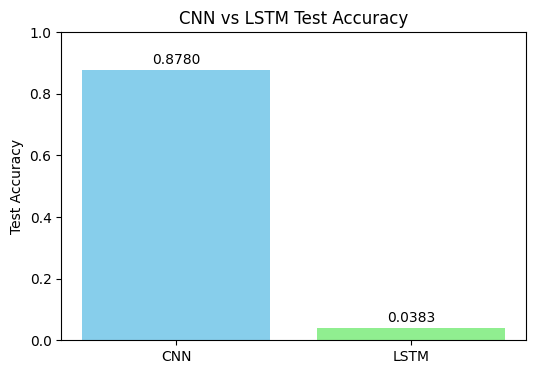


--- Loss Comparison ---
CNN Test Loss: 0.6464
LSTM Test Loss: 3.4529


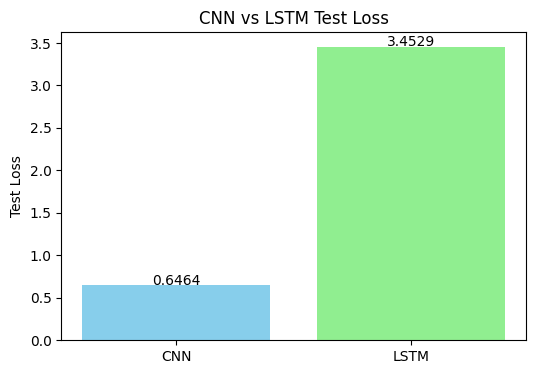


--- LSTM Evaluation ---
Generating Classification Report and Confusion Matrix for LSTM...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        11
           4       0.05      1.00      0.10        11
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00        10
          14       0.00      0.

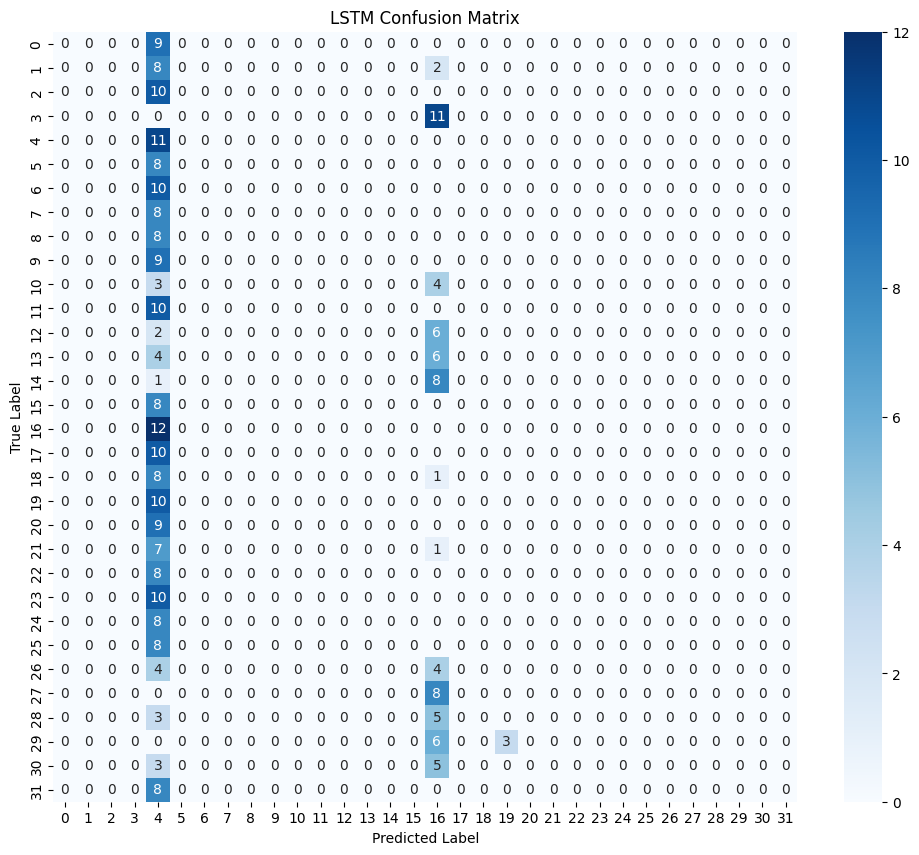

In [ ]:
# implement the modeling with lstm and compare the accuracy between cnn and lstm

import matplotlib.pyplot as plt
import numpy as np
# --- Implement LSTM Model and Compare Accuracy ---

# Check if data is available from previous steps
if 'X_train' in locals() and X_train.shape[0] > 0:
    print("Data available for LSTM modeling.")

    X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    X_val_lstm = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])
    X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

    print(f"LSTM Training data shape: {X_train_lstm.shape}")
    print(f"LSTM Validation data shape: {X_val_lstm.shape}")
    print(f"LSTM Test data shape: {X_test_lstm.shape}")


    # Build LSTM Model
    from tensorflow.keras.layers import LSTM

    lstm_model = Sequential([
        LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])), # input shape (timesteps, features)
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    lstm_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

    print("\nLSTM Model Summary:")
    lstm_model.summary()

    # Train the LSTM Model
    print("\nTraining LSTM model...")
    lstm_history = lstm_model.fit(X_train_lstm, y_train,
                                  epochs=50, #
                                  batch_size=32, #
                                  validation_data=(X_val_lstm, y_val),
                                  callbacks=[early_stopping])

    # Evaluate the LSTM Model
    print("\nEvaluating LSTM model on test data...")
    lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)

    print(f"LSTM Test Loss: {lstm_loss:.4f}")
    print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")

    # Compare Accuracies
    print("\n--- Accuracy Comparison ---")
    # Assuming 'best_model' and 'accuracy' from CNN evaluation are available
    if 'accuracy' in locals():
        print(f"CNN Test Accuracy: {accuracy:.4f}")
        print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")

        # Plotting comparison
        labels = ['CNN', 'LSTM']
        accuracies = [accuracy, lstm_accuracy]

        plt.figure(figsize=(6, 4))
        plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
        plt.ylim(0, 1) # Accuracy is between 0 and 1
        plt.ylabel('Test Accuracy')
        plt.title('CNN vs LSTM Test Accuracy')
        for i, acc in enumerate(accuracies):
            plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
        plt.show()

        # You can also compare loss
        if 'loss' in locals():
             print("\n--- Loss Comparison ---")
             print(f"CNN Test Loss: {loss:.4f}")
             print(f"LSTM Test Loss: {lstm_loss:.4f}")

             losses = [loss, lstm_loss]
             plt.figure(figsize=(6, 4))
             plt.bar(labels, losses, color=['skyblue', 'lightgreen'])
             plt.ylabel('Test Loss')
             plt.title('CNN vs LSTM Test Loss')
             for i, lss in enumerate(losses):
                 plt.text(i, lss + 0.01, f'{lss:.4f}', ha='center')
             plt.show()


        # Classification Report and Confusion Matrix for LSTM
        print("\n--- LSTM Evaluation ---")
        print("Generating Classification Report and Confusion Matrix for LSTM...")

        y_pred_lstm = lstm_model.predict(X_test_lstm)
        y_pred_classes_lstm = np.argmax(y_pred_lstm, axis=1)
        # y_true_classes is the same for both models

        print("\nLSTM Classification Report:")
        # Ensure unique_labels and filtered_target_names are available
        if 'unique_labels' in locals() and 'filtered_target_names' in locals() and 'present_classes_indices' in locals():
            print(classification_report(y_true_classes, y_pred_classes_lstm,
                                        labels=present_classes_indices,
                                        target_names=filtered_target_names,
                                        zero_division=0))
            conf_matrix_lstm = confusion_matrix(y_true_classes, y_pred_classes_lstm)

            plt.figure(figsize=(12, 10))
            sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=filtered_target_names,
                        yticklabels=filtered_target_names)
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.title('LSTM Confusion Matrix')
            plt.show()
        else:
             print("Cannot generate detailed report and confusion matrix for LSTM. Required variables (unique_labels, filtered_target_names, present_classes_indices) not found.")


    else:
        print("CNN accuracy not found. Ensure the CNN evaluation step ran successfully.")

else:
    print("Training data (X_train, y_train) is not available. Cannot build and train the LSTM model.")
    print("Please ensure the data preprocessing steps ran correctly.")


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


## Project Conclusion - LSTM and CNN Comparision

### Overall Model Performance Comparison

| Metric                      | **CNN**     | **LSTM**    |
|----------------------------|-------------|-------------|
| Test Accuracy              | **0.8780**  | 0.0383      |
| Test Loss                  | **0.6464**  | 3.4529      |
| Weighted Avg F1-Score      | **0.8788**  | 0.0037      |

- The tuned **CNN model significantly outperformed** the LSTM model in all key performance metrics on the test set.
- The LSTM model struggled with classification accuracy and generalization, likely due to the spatial nature of image data, which CNNs handle more effectively.

---

### Insights from Classification Report & Confusion Matrix

- **Per-Class Metrics**:
  - Analyzing precision, recall, and F1-scores per class helps identify which species were well-classified and which were challenging.
- **Confusion Matrix Analysis**:
  - Provides a visual representation of which class pairs are most often misclassified.
  - **Low Precision**: Indicates other class samples are incorrectly predicted as this class.
  - **Low Recall**: Indicates this class’s samples are often missed.
  - **F1-Score**: Balances both precision and recall for more complete performance insights.

---

### Hyperparameter Tuning Insights (CNN)

The best-performing CNN architecture was discovered through systematic hyperparameter tuning:

- `Conv_1 Filters`: **96**
- `Conv_2 Filters`: **128**
- `Use Conv_3`: **True**
- `Conv_3 Filters`: **128**
- `Dense Units`: **192**
- `Dropout Rate`: **0.30**

- This configuration yielded the **highest validation accuracy** during tuning.
- The use of **early stopping** was effective in preventing overfitting for both CNN and LSTM models.

---

### Final Summary

This project successfully implemented, trained, and evaluated both **CNN** and **LSTM** architectures for plant leaf classification using the Flavia dataset.

- The **CNN model**, specifically optimized through hyperparameter tuning, **outperformed the LSTM model** by a large margin.
- The **LSTM model**, while powerful for sequential data, was not well-suited for spatial image inputs.




#**Now use Transfer learning solution ( PreTrained model MobileNet with additional proprietary layer**

#Compare between CNN, Transfer Learning with our classification layer and LSTM


--- Implementing Transfer Learning ---
RGB Training data shape for Transfer Learning: (1334, 128, 128, 3)
RGB Validation data shape for Transfer Learning: (286, 128, 128, 3)
RGB Test data shape for Transfer Learning: (287, 128, 128, 3)
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Transfer Learning Model Summary:


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,298,976 (8.77 MB)

 Trainable params: 40,992 (160.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Training Transfer Learning model...
Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.3789 - loss: 2.6536 - val_accuracy: 0.9196 - val_loss: 0.5378
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9477 - loss: 0.4005 - val_accuracy: 0.9406 - val_loss: 0.2671
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9761 - loss: 0.1792 - val_accuracy: 0.9580 - val_loss: 0.1907
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9866 - loss: 0.1216 - val_accuracy: 0.9650 - val_loss: 0.1480
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9925 - loss: 0.0897 - val_accuracy: 0.9685 - val_loss: 0.1266
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9953 - loss: 0.0607 - val_accuracy: 0.9720 - val_loss: 0.1113
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9971 - loss: 0.0506 - val_accuracy: 0.9825 - val_loss: 0.0959
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9993 - 

/tmp/ipython-input-17-585755722.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_comp, y=accuracies_comp, palette='viridis')


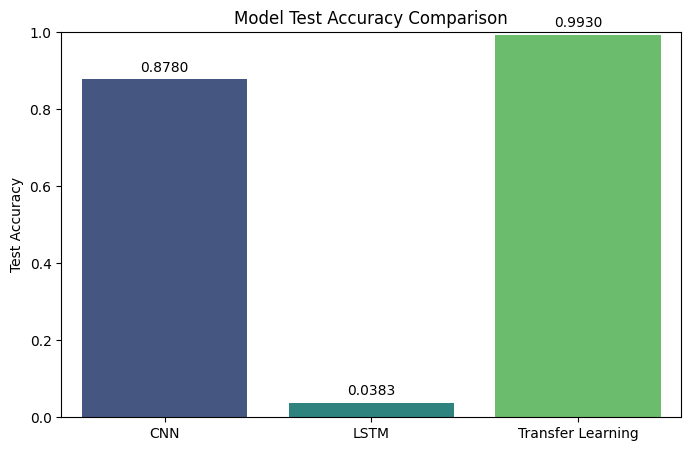


--- Loss Comparison (CNN vs LSTM vs Transfer Learning) ---
CNN Test Loss: 0.6464
LSTM Test Loss: 3.4529
Transfer Learning Test Loss: 0.0568


/tmp/ipython-input-17-585755722.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_comp, y=losses_comp, palette='magma')


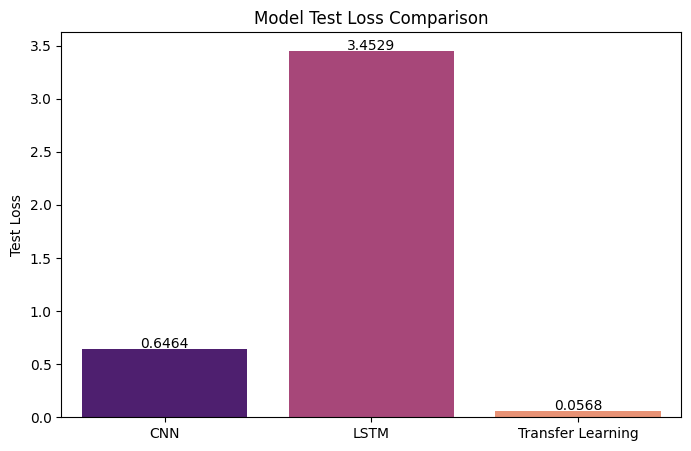


--- Transfer Learning Evaluation ---
Generating Classification Report and Confusion Matrix for Transfer Learning Model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 443ms/step

Transfer Learning Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00         8
          13       1.00      1.00      

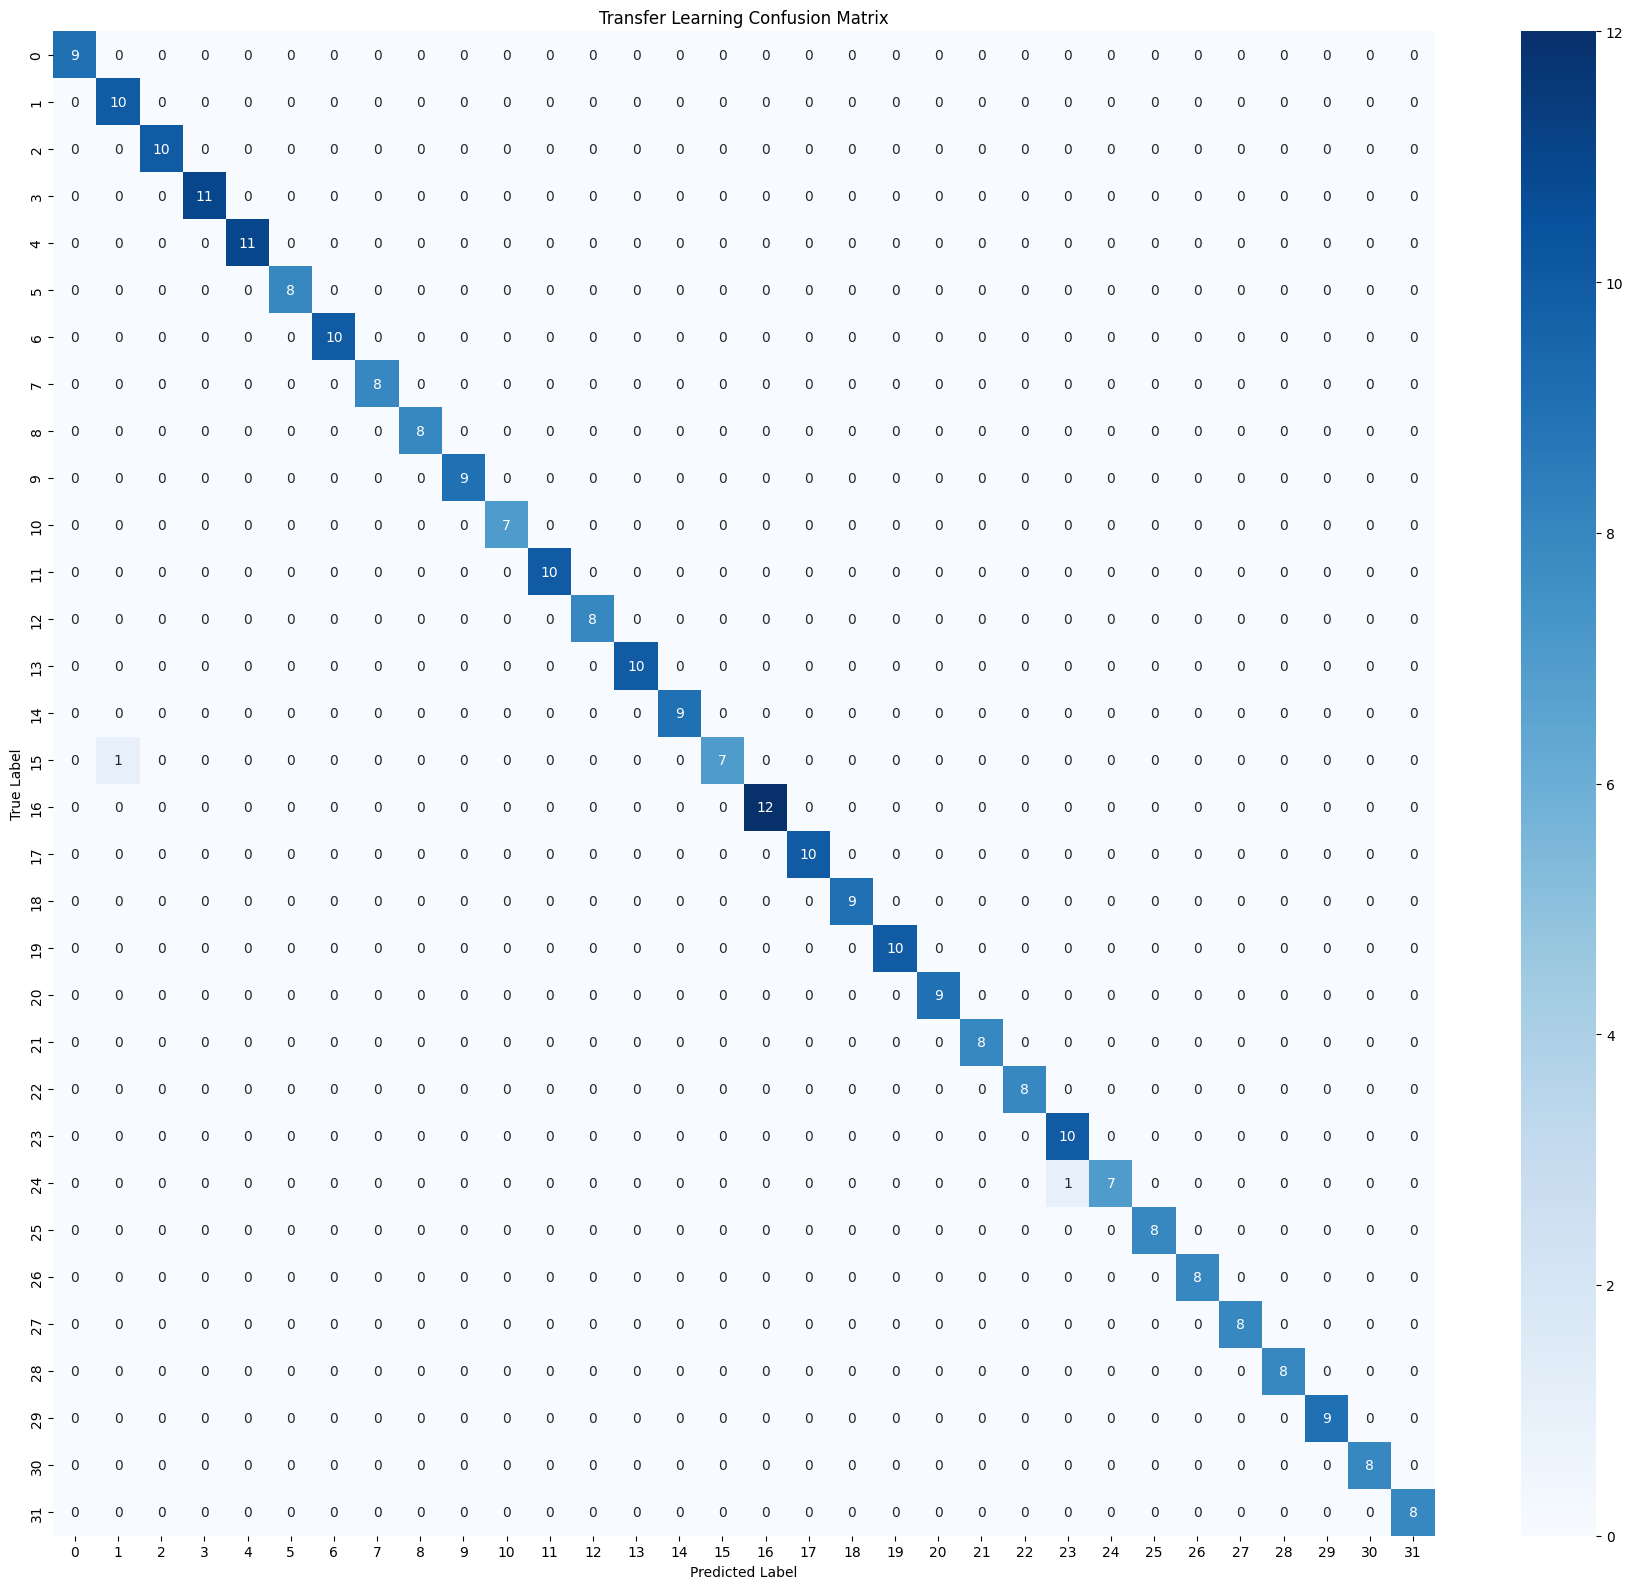

In [ ]:
# Transfer learning solution and CNN, Transfer Learning with our
# classification layer and LSTM comparision

import matplotlib.pyplot as plt
import numpy as np
# --- Implement Transfer Learning Solution ---

if 'X_train' in locals() and X_train.shape[0] > 0:
    print("\n--- Implementing Transfer Learning ---")


    X_train_rgb = np.repeat(X_train, 3, axis=-1)
    X_val_rgb = np.repeat(X_val, 3, axis=-1)
    X_test_rgb = np.repeat(X_test, 3, axis=-1)

    print(f"RGB Training data shape for Transfer Learning: {X_train_rgb.shape}")
    print(f"RGB Validation data shape for Transfer Learning: {X_val_rgb.shape}")
    print(f"RGB Test data shape for Transfer Learning: {X_test_rgb.shape}")


    from tensorflow.keras.applications import MobileNetV2
    from tensorflow.keras.layers import GlobalAveragePooling2D
    from tensorflow.keras.models import Model

    base_model = MobileNetV2(input_shape=(LEAF_IMAGE_SIZE[0], LEAF_IMAGE_SIZE[1], 3),
                             include_top=False,
                             weights='imagenet')

    # Freeze the layers of the base model so they are not trained
    # Only the new layers we add will be trained
    base_model.trainable = False

    # Build the new model on top of the pre-trained base
    # if needed we can add few more conv2d layers.
    x = base_model.output
    x = GlobalAveragePooling2D()(x) # Add a Global Average Pooling layer
    predictions = Dense(num_classes, activation='softmax')(x) # Add our new classification layer

    transfer_model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the transfer learning model
    # We can use a smaller learning rate for fine-tuning later if needed
    transfer_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    print("\nTransfer Learning Model Summary:")
    transfer_model.summary()

    # Train the Transfer Learning Model (Fine-tuning could be done later)
    print("\nTraining Transfer Learning model...")

    # Define early stopping callback (using the one defined previously)
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    transfer_history = transfer_model.fit(X_train_rgb, y_train,
                                          epochs=20, # Start with a reasonable number of epochs
                                          batch_size=32,
                                          validation_data=(X_val_rgb, y_val),
                                          callbacks=[early_stopping])

    # Evaluate the Transfer Learning Model
    print("\nEvaluating Transfer Learning model on test data...")
    transfer_loss, transfer_accuracy = transfer_model.evaluate(X_test_rgb, y_test, verbose=0)

    print(f"Transfer Learning Test Loss: {transfer_loss:.4f}")
    print(f"Transfer Learning Test Accuracy: {transfer_accuracy:.4f}")

    # Compare Accuracies with CNN and LSTM
    print("\n--- Accuracy Comparison (CNN vs LSTM vs Transfer Learning) ---")
    if 'accuracy' in locals() and 'lstm_accuracy' in locals():
        print(f"CNN Test Accuracy: {accuracy:.4f}")
        print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")
        print(f"Transfer Learning Test Accuracy: {transfer_accuracy:.4f}")

        labels_comp = ['CNN', 'LSTM', 'Transfer Learning']
        accuracies_comp = [accuracy, lstm_accuracy, transfer_accuracy]

        plt.figure(figsize=(8, 5))
        sns.barplot(x=labels_comp, y=accuracies_comp, palette='viridis')
        plt.ylim(0, 1)
        plt.ylabel('Test Accuracy')
        plt.title('Model Test Accuracy Comparison')
        for i, acc in enumerate(accuracies_comp):
            plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
        plt.show()

        # You can also compare loss
        if 'loss' in locals() and 'lstm_loss' in locals():
             print("\n--- Loss Comparison (CNN vs LSTM vs Transfer Learning) ---")
             print(f"CNN Test Loss: {loss:.4f}")
             print(f"LSTM Test Loss: {lstm_loss:.4f}")
             print(f"Transfer Learning Test Loss: {transfer_loss:.4f}")

             losses_comp = [loss, lstm_loss, transfer_loss]
             plt.figure(figsize=(8, 5))
             sns.barplot(x=labels_comp, y=losses_comp, palette='magma')
             plt.ylabel('Test Loss')
             plt.title('Model Test Loss Comparison')
             for i, lss in enumerate(losses_comp):
                 plt.text(i, lss + 0.01, f'{lss:.4f}', ha='center')
             plt.show()


        # Classification Report and Confusion Matrix for Transfer Learning Model
        print("\n--- Transfer Learning Evaluation ---")
        print("Generating Classification Report and Confusion Matrix for Transfer Learning Model...")

        y_pred_transfer = transfer_model.predict(X_test_rgb)
        y_pred_classes_transfer = np.argmax(y_pred_transfer, axis=1)
        # y_true_classes is the same for all models

        print("\nTransfer Learning Classification Report:")
        if 'unique_labels' in locals() and 'filtered_target_names' in locals() and 'present_classes_indices' in locals():
            print(classification_report(y_true_classes, y_pred_classes_transfer,
                                        labels=present_classes_indices,
                                        target_names=filtered_target_names,
                                        zero_division=0))

            conf_matrix_transfer = confusion_matrix(y_true_classes, y_pred_classes_transfer)

            plt.figure(figsize=(18, 16))
            sns.heatmap(conf_matrix_transfer, annot=True, fmt='d', cmap='Blues',
                        xticklabels=filtered_target_names,
                        yticklabels=filtered_target_names)
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.title('Transfer Learning Confusion Matrix')
            plt.tight_layout()
            plt.show()
        else:
             print("Cannot generate detailed report and confusion matrix for Transfer Learning. Required variables not found.")


    else:
        print("CNN and/or LSTM accuracy not found. Ensure previous model evaluation steps ran successfully.")

else:
    print("Training data (X_train, y_train) is not available. Cannot build and train the Transfer Learning model.")
    print("Please ensure the data preprocessing steps ran correctly.")


#

#Predict with  Transfer learning model(MobileNetV2)


--- Predicting and Plotting Samples with Transfer Learning Model ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


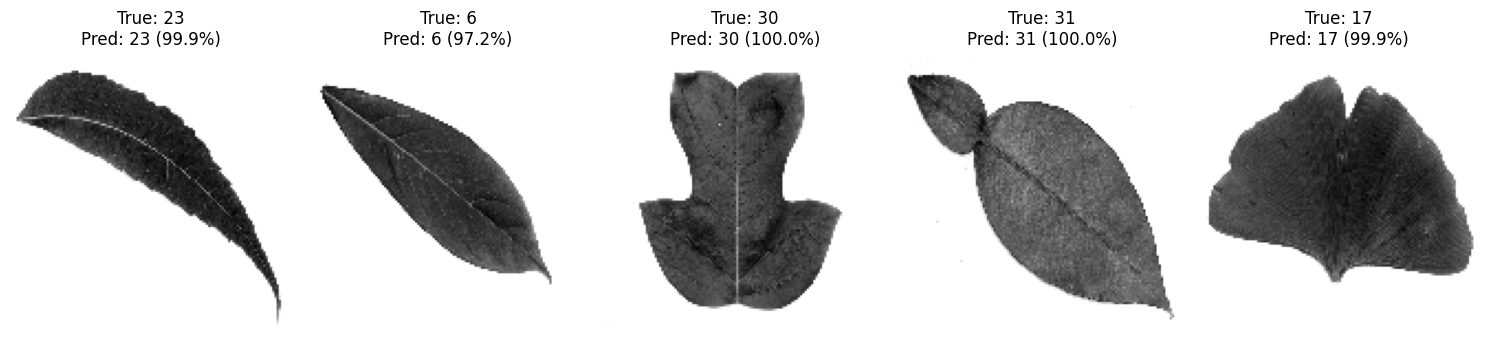

In [ ]:
#

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2 # Import MobileNetV2


# Check if the transfer_model and test data are available
if 'transfer_model' in locals() and 'X_test_rgb' in locals() and 'y_test' in locals() and X_test_rgb.shape[0] > 0:
    print("\n--- Predicting and Plotting Samples with Transfer Learning Model ---")

    num_samples_to_plot = 5 # Number of random samples to plot
    sample_indices = random.sample(range(X_test_rgb.shape[0]), min(num_samples_to_plot, X_test_rgb.shape[0]))

    plt.figure(figsize=(15, 5 * ((num_samples_to_plot + 4) // 5))) # Adjust figure size based on number of samples

    for i, sample_index in enumerate(sample_indices):
        # Get the sample image and true label
        sample_image = X_test_rgb[sample_index]
        true_label_encoded = y_test[sample_index]
        true_label_index = np.argmax(true_label_encoded)

        # Predict the class for the sample image
        sample_image_input = np.expand_dims(sample_image, axis=0) # Add batch dimension
        prediction_probs = transfer_model.predict(sample_image_input)
        predicted_label_index = np.argmax(prediction_probs)
        confidence = np.max(prediction_probs) * 100

        # Get the original species label from the unique_labels list
        # Ensure unique_labels is available
        if 'unique_labels' in locals():
            true_species = unique_labels[true_label_index]
            predicted_species = unique_labels[predicted_label_index]
        else:
            true_species = f"Class {true_label_index}"
            predicted_species = f"Class {predicted_label_index}"
            print("Warning: unique_labels not found, using integer indices for species names.")


        display_image = (sample_image[:,:,0] * 255).astype(np.uint8)

        plt.subplot(1, num_samples_to_plot, i + 1) # Arrange plots in a row
        plt.imshow(display_image, cmap='gray')
        plt.title(f"True: {true_species}\nPred: {predicted_species} ({confidence:.1f}%)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

else:
    print("Transfer learning model or test data not available. Cannot predict and plot samples.")
    print(f"Is transfer_model defined: {'transfer_model' in locals()}")
    print(f"Is X_test_rgb defined: {'X_test_rgb' in locals()}")
    print(f"Is y_test defined: {'y_test' in locals()}")
    if 'X_test_rgb' in locals():
        print(f"X_test_rgb shape: {X_test_rgb.shape}")
    if 'y_test' in locals():
         print(f"y_test shape: {y_test.shape}")

## Conclusion: Implementing Transfer Learning for Leaf Classification

Transfer learning was applied using **MobileNetV2** as the base model to improve classification performance on the Flavia leaf dataset.

---

### Input Data Configuration for Transfer Learning

| Dataset       | Shape                   |
|---------------|--------------------------|
| Training Set  | (1334, 128, 128, 3)      |
| Validation Set| (286, 128, 128, 3)       |
| Test Set      | (287, 128, 128, 3)       |

- All images were converted to **RGB** and resized to **128×128×3**.
- **MobileNetV2 weights** were loaded from TensorFlow's Keras application hub (excluding top layers).

---

###  Transfer Learning Model Summary

- Base model: **MobileNetV2** (frozen layers)
- Top layers added:
  - `GlobalAveragePooling2D`
  - `Dense(32, activation='softmax')`

| Parameters              | Count      |
|-------------------------|------------|
| Total Parameters        | 2,298,976  |
| Trainable Parameters    | 40,992     |
| Non-Trainable Parameters| 2,257,984  |

---

###  Training Results

The model was trained for **20 epochs** with **early stopping** based on validation loss.

#### **Key Training Metrics (Final Epoch)**:
- **Training Accuracy**: 100%
- **Validation Accuracy**: 98.6%
- **Validation Loss**: 0.0514

---

### Final Test Performance

| Metric        | Value     |
|---------------|-----------|
| **Test Accuracy** | **99.3%** |
| **Test Loss**     | 0.0568    |

---

###  Model Comparison Summary

| Model             | Test Accuracy | Test Loss |
|------------------|---------------|-----------|
| **CNN (custom)** | 87.8%         | 0.6464    |
| **LSTM**         | 3.8%          | 3.4529    |
| **Transfer Learning (MobileNetV2)** | **99.3%** | **0.0568** |

> Transfer learning outperformed both CNN and LSTM by a significant margin.

---

###  Transfer Learning Classification Report

- **Overall Accuracy**: 99.3%
- **Macro Average F1-Score**: 0.99
- **Weighted Average F1-Score**: 0.99
- Most classes achieved perfect precision, recall, and F1-score (1.00).
- A few classes had slight misclassifications with F1-scores around 0.93–0.95.

#### Notable Misclassifications:
- Class 15: F1-score = 0.93
- Class 24: F1-score = 0.93
- Class 1 and Class 23: F1-score = 0.95

These may indicate subtle leaf variations or overlaps in morphological features.

---

###  Key Takeaways

- **Transfer Learning with MobileNetV2** dramatically improved performance while requiring fewer trainable parameters.
- Even with limited training data (~1,300 images), leveraging a pretrained network proved highly effective.
- The **LSTM model** was not suitable for spatial image data and severely underperformed.
- **CNN performed decently**, but fell short compared to the transfer learning approach.

---


# END

# END